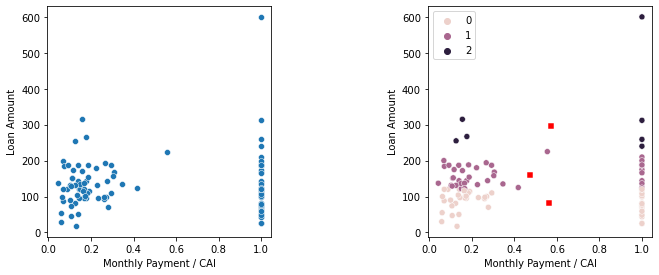

In [1]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('datasetEligble.csv')


mh1 = pd.DataFrame(data, columns = ['Dependents'])
mh2 = pd.DataFrame(data, columns = ['Applicant Income'])
mh3 = pd.DataFrame(data, columns = ['Coapplicant Income'])
mh4 = pd.DataFrame(data, columns = ['Loan Amount'])
mh5 = pd.DataFrame(data, columns = ['Loan Amount Term'])
mh6 = pd.DataFrame(data, columns = ['Property Area'])
mh7 = pd.DataFrame(data, columns = ['Monthly Payment / AI'])
mh8 = pd.DataFrame(data, columns = ['Monthly payment / CAI'])

mh_x1 = np.append(mh1, mh4, axis=1)
mh_x2 = np.append(mh2, mh4, axis=1)
mh_x3 = np.append(mh3, mh4, axis=1)
mh_x4 = np.append(mh5, mh4, axis=1)
mh_x5 = np.append(mh6, mh4, axis=1)
mh_x6 = np.append(mh7, mh4, axis=1)
mh_x7 = np.append(mh8, mh4, axis=1)


x1 = mh_x1
x2 = mh_x2
x3 = mh_x3
x4 = mh_x4
x5 = mh_x5
x6 = mh_x6
x7 = mh_x7

# Fit FCM in 3 clusters
fcm = FCM(n_clusters = 3)
fcm.fit(x7)

# Centers and labels
centers = fcm.centers
labels  = fcm.u.argmax(axis = 1)


f, axes = plt.subplots(1, 2)
scatter(x7[:,0], x7[:,1], ax = axes[0])
scatter(x7[:,0], x7[:,1], ax = axes[1], hue = labels)

scatter(centers[:,0], centers[:,1], ax = axes[1], marker = "s", color = 'r', s = 35)

for ax in axes.flat:
    ax.set(xlabel = 'Monthly Payment / CAI', ylabel = 'Loan Amount')
 

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)
    
plt.show()